In [1]:
# import necessary modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

import pickle as pickle

%matplotlib inline


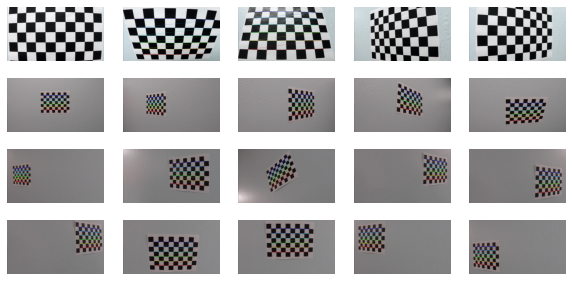

In [2]:
nx=9 #* columns corners no
ny=6 #* rows corners no

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)


# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.



# Make a list of calibration images
plt.figure(figsize = (10,5))
mtx_all = []
dist_all = []
for i in range(20):
    # images path
    fname = 'cal/calibration'+ str(i+1) + '.jpg' 
    # read images
    img = cv2.imread(fname) 
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    plt.subplot(4,5,i+1)

    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        objpoints.append(objp)
        imgpoints.append(corners)
        
        plt.imshow(img)

    else:
        plt.imshow(img)
    plt.axis('off')

In [7]:
fname = 'cal/calibration'+ str(1) + '.jpg' #second image in calebration folder path
img = cv2.imread(fname) # read second image in calebration folder
img_size = (img.shape[1], img.shape[0]) # image size in a tuple
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None) # calibrate the camera
data = [mtx,dist] # make data list to be pickled

pickle.dump( data, open( "camera_calibration.pkl", "wb" ) ) # dump the calebration data to be used later using pickle
